# Plots of Dimension reduction on Wikipedia data

First we load the libraries and data ... I have saved off the dimension reduction results of the various algorithms.

In [11]:
import datamapplot
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use("mpl_style.txt")
import matplotlib.pyplot as plt

plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

plt.rcParams['savefig.bbox'] = 'tight'

wikipedia_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_umap_data_map_1.npy")
wikipedia_labels = np.load("../data/Simple-English-Wikipedia/Wikipedia-cluster_labels.npy", allow_pickle=True)
wikipedia_labels_2 = np.load("../data/Simple-English-Wikipedia/wikipedia_azureai_topic_layer_2.npy", allow_pickle=True)

tsne_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_tsne_data_map_1.npy")
pca_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_pca_data_map_1.npy")
mds_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_mds_data_map_1.npy")
le_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_le_data_map_1.npy")
phate_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_phate_data_map_1.npy")

In [12]:
import pkg_resources
print(pkg_resources.get_distribution('datamapplot').version)


0.5.1


We rotate the umap coordinates to make more efficient use of the space in the plot.

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_39062/515802926.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10",alpha=.01,s=1, marker=".")


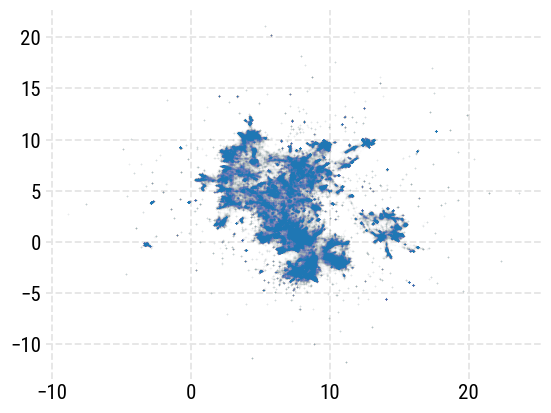

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_39062/515802926.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rotated_wikipedia_data_map[:,0], rotated_wikipedia_data_map[:,1], cmap="tab10",alpha=.01,s=1, marker=".")


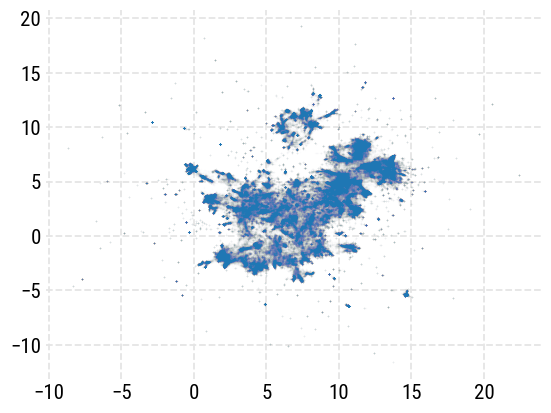

In [13]:

plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10",alpha=.01,s=1, marker=".")
plt.show()

# Calculate mean point to rotate around
center = np.mean(wikipedia_data_map, axis=0)

# Convert 45 percent to radians (45% of 360 degrees = 162 degrees)
theta = np.radians(110)

# Create rotation matrix
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Center the points, rotate, then uncenter
centered_points = wikipedia_data_map - center
rotated_points = np.dot(centered_points, rotation_matrix.T) 
rotated_wikipedia_data_map = rotated_points + center



plt.scatter(rotated_wikipedia_data_map[:,0], rotated_wikipedia_data_map[:,1], cmap="tab10",alpha=.01,s=1, marker=".")
plt.show()

We want a consistent palette; here we are essentially reusing internal code in datamapplot to make a palette based on the UMAP embedding.

In [20]:
unique_non_noise_labels = [
    label for label in np.unique(wikipedia_labels) if label != "Unlabelled"
]
cluster_centers = np.asarray([
    rotated_wikipedia_data_map[wikipedia_labels == label].mean(axis=0)
    for label in unique_non_noise_labels
])
palette = datamapplot.palette_handling.palette_from_datamap(
    rotated_wikipedia_data_map,
    cluster_centers,
    hue_shift=0.0,
    radius_weight_power=1.0,
    min_lightness=15,
)
label_color_map = dict(zip(unique_non_noise_labels, palette))

label_color_map['Unlabelled'] = "#969696"

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment
Min fontsize: 4.0
Max fontsize: 12.754584000000001


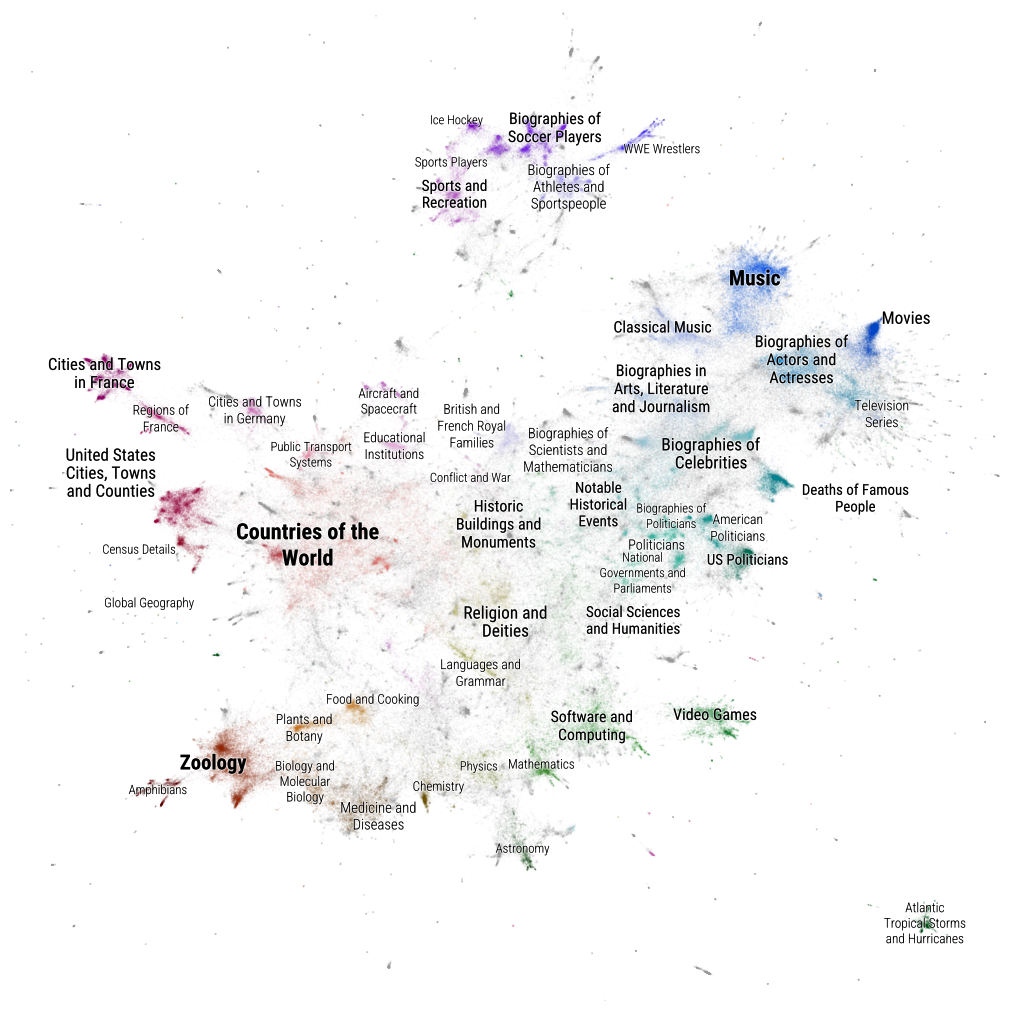

In [21]:
fig, ax = datamapplot.create_plot(
    rotated_wikipedia_data_map.astype(np.float32),
    wikipedia_labels,
    use_medoids=True,
    font_family="Roboto Condensed",
    point_size=1.3,
    label_linespacing=1.25,add_glow=False,

    color_label_text=False,
    force_matplotlib=True,

    label_over_points=True,
    dynamic_label_size=True,
    # min_fontsize=8, # These somehow dont work for me?
    # max_font_size=100,
    label_font_stroke_width=1.5 
)

# Print min and max of current font sizes
font_sizes = [txt.get_fontsize() for txt in ax.texts]
print("Min fontsize:", min(font_sizes))
print("Max fontsize:", max(font_sizes))

# Rescale font sizes to a new range, e.g., 5-10
min_new, max_new = 9, 16
min_old, max_old = min(font_sizes), max(font_sizes)
for txt in ax.texts:
    old_size = txt.get_fontsize()
    # Avoid division by zero if all font sizes are the same
    if max_old > min_old:
        new_size = min_new + (old_size - min_old) * (max_new - min_new) / (max_old - min_old)
    else:
        new_size = (min_new + max_new) / 2
    txt.set_fontsize(new_size)
# set axis limits to the data bounds 
# Not sure whether we want this, we are cutting off a hand full of noise points by zooming in.
ax.set_xlim(-2,16)
ax.set_ylim(-7,14)
fig.set_frameon(False)
fig.savefig("../figures/umap_pca-init_wikipedia_map.jpg", dpi=400, facecolor="white")
fig.savefig("../figures/umap_pca-init_wikipedia_map.png", dpi=400, facecolor="white")

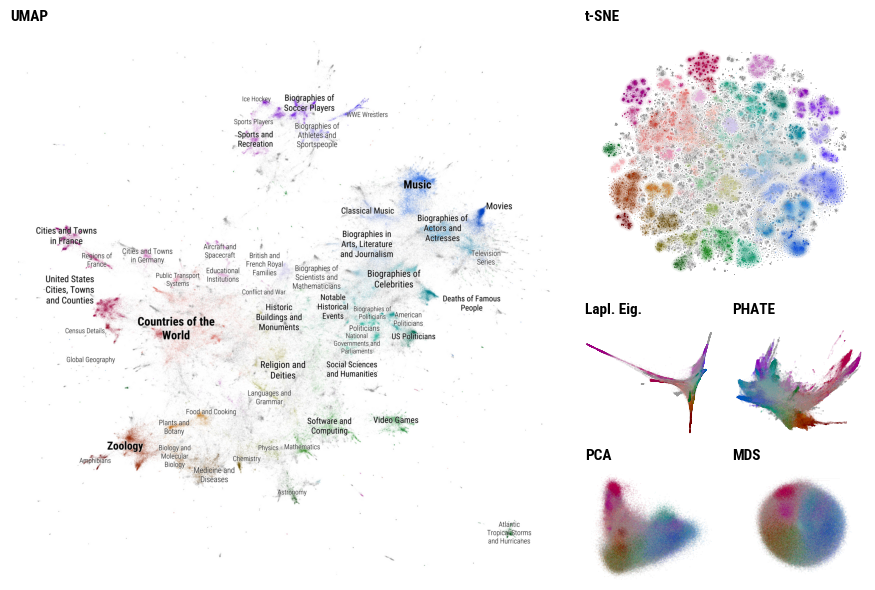

In [22]:


fig, ax_dict = plt.subplot_mosaic(
'''
AAAABB
AAAABB
AAAACD
AAAAEF
''',
figsize=(9,6),
dpi=100,
)
# Replace UMAP plot with the static image
img = plt.imread("../figures/umap_pca-init_wikipedia_map.jpg")
ax_dict["A"].imshow(img)
ax_dict["A"].axis("off")
ax_dict["A"].set_title("UMAP", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["B"].set_title("t-SNE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["D"].set_title("PHATE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["C"].set_title("Lapl. Eig.", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["E"].set_title("PCA", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["F"].set_title("MDS", fontfamily="Roboto Condensed", fontsize=11, pad=10)

fig_, ax = datamapplot.create_plot(
    tsne_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="t-SNE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":16},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":2.5},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.35,
    ax=ax_dict["B"],
)
fig_, ax = datamapplot.create_plot(
    le_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Laplacian Eigenmaps",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-6},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["C"],
)
fig_, ax = datamapplot.create_plot(
    2000 * phate_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="PHATE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":0.3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["D"],
)
fig_, ax = datamapplot.create_plot(
    pca_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Principal Component Analysis",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["E"],
)
fig_, ax = datamapplot.create_plot(
    mds_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Multidimensional Scaling",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=.7,
    ax=ax_dict["F"],
)
plt.axis("equal")   
plt.tight_layout()
fig.savefig("../figures/wikipedia_figure.jpg", dpi=300, facecolor="white")
fig.savefig("../figures/wikipedia_figure.png", dpi=300, facecolor="white")

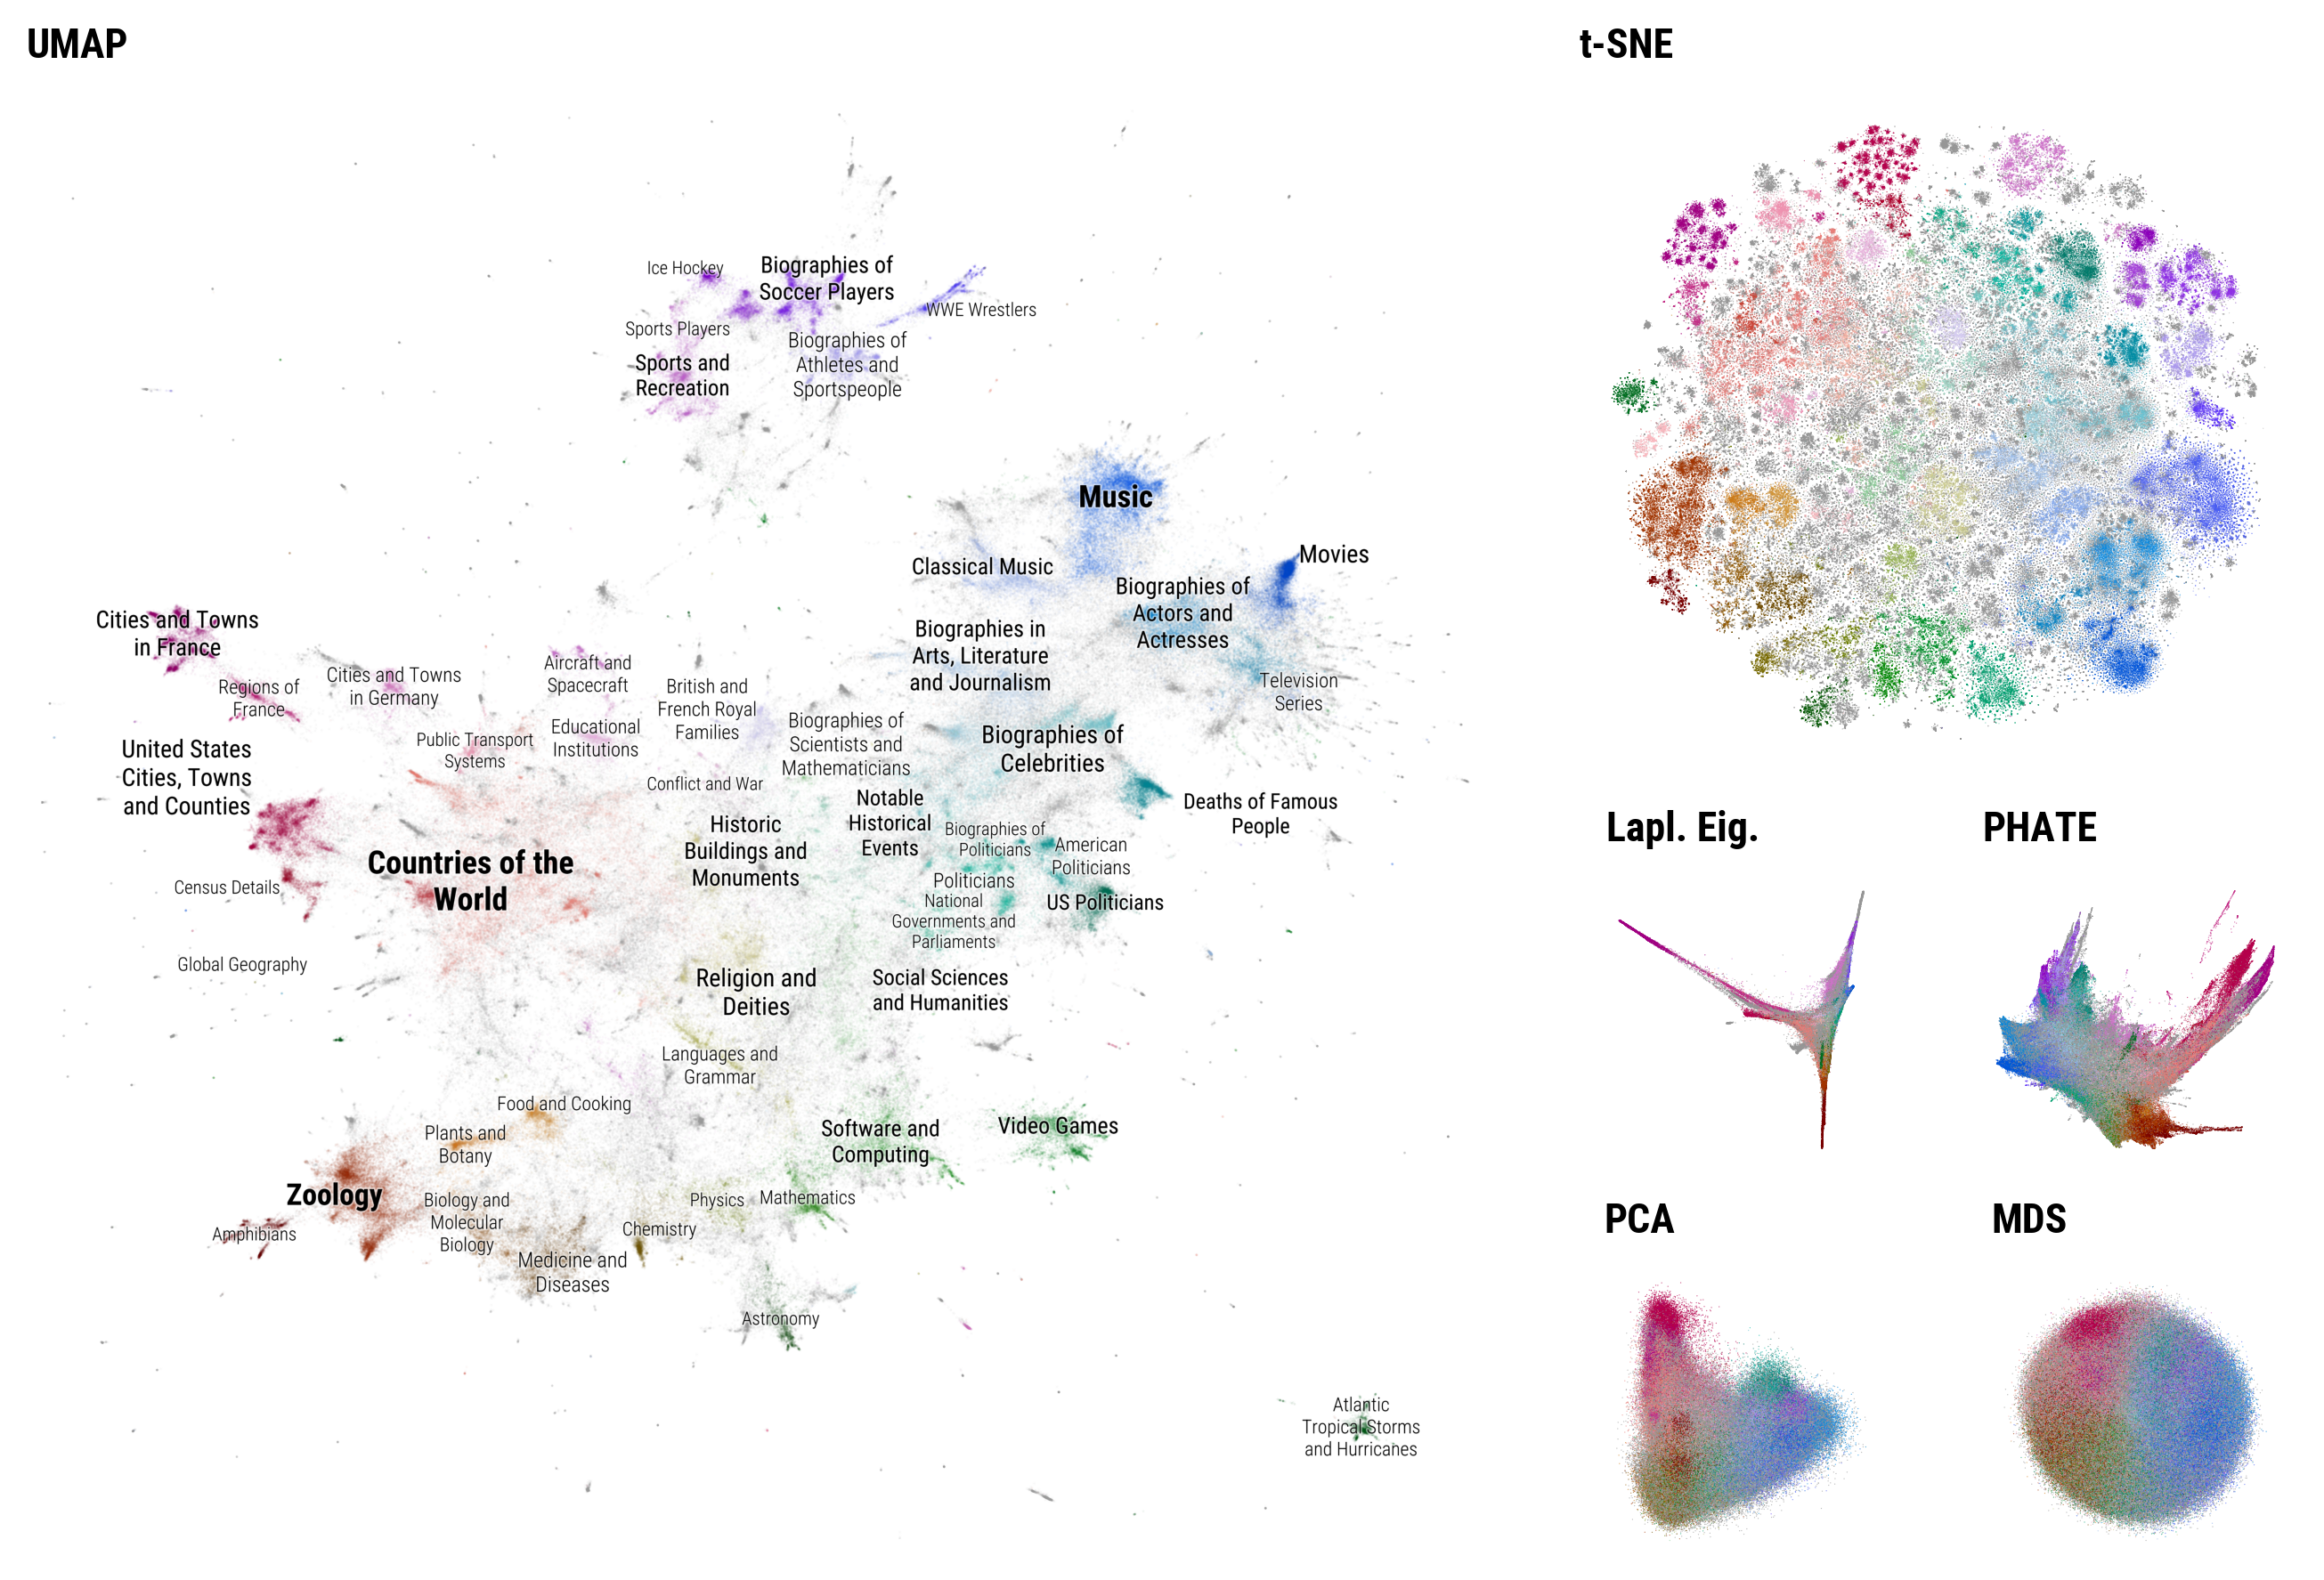

In [23]:
fig, ax_dict = plt.subplot_mosaic(
'''
AAAABB
AAAABB
AAAACD
AAAAEF
''',
figsize=(9,6),
dpi=300,
)

# Replace UMAP plot with the static image
img = plt.imread("../figures/umap_pca-init_wikipedia_map.png")
ax_dict["A"].imshow(img)
ax_dict["A"].axis("off")
ax_dict["A"].set_title("UMAP", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["B"].set_title("t-SNE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["D"].set_title("PHATE", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["C"].set_title("Lapl. Eig.", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["E"].set_title("PCA", fontfamily="Roboto Condensed", fontsize=11, pad=10)
ax_dict["F"].set_title("MDS", fontfamily="Roboto Condensed", fontsize=11, pad=10)




colors = [label_color_map.get(label) for label in wikipedia_labels]

# Separate noise and non-noise points for each dataset
def separate_noise_points(data, colors, labels):
    noise_mask = np.array([label == -1 for label in labels])
    non_noise_mask = ~noise_mask
    
    noise_data = data[noise_mask]
    non_noise_data = data[non_noise_mask]
    noise_colors = np.array(colors)[noise_mask]
    non_noise_colors = np.array(colors)[non_noise_mask]
    
    return noise_data, non_noise_data, noise_colors, non_noise_colors

# t-SNE scatter plot
noise_tsne, non_noise_tsne, noise_colors_tsne, non_noise_colors_tsne = separate_noise_points(
    tsne_data_map, colors, wikipedia_labels)
plt.sca(ax_dict["B"])
plt.scatter(noise_tsne[:, 0], noise_tsne[:, 1], c=noise_colors_tsne, s=0.5, alpha=0.7, marker=".",edgecolors='none', lw=0)
plt.scatter(non_noise_tsne[:, 0], non_noise_tsne[:, 1], c=non_noise_colors_tsne, s=0.4, alpha=0.4, marker=".",edgecolors='none', lw=0)
ax_dict["B"].set_aspect('equal')
ax_dict["B"].axis('off')

# Laplacian Eigenmaps scatter plot
noise_le, non_noise_le, noise_colors_le, non_noise_colors_le = separate_noise_points(
    le_data_map, colors, wikipedia_labels)
plt.sca(ax_dict["C"])
plt.scatter(noise_le[:, 0], noise_le[:, 1], c=noise_colors_le, s=0.5, alpha=0.7,marker=".", edgecolors='none', lw=0 )
plt.scatter(non_noise_le[:, 0], non_noise_le[:, 1], c=non_noise_colors_le, s=0.4, alpha=0.6, marker=".",edgecolors='none', lw=0)
ax_dict["C"].set_aspect('equal')
ax_dict["C"].axis('off')

# PHATE scatter plot
noise_phate, non_noise_phate, noise_colors_phate, non_noise_colors_phate = separate_noise_points(
    2000 * phate_data_map, colors, wikipedia_labels)
plt.sca(ax_dict["D"])
plt.scatter(noise_phate[:, 0], noise_phate[:, 1], c=noise_colors_phate, s=0.5, alpha=0.7, marker=".",edgecolors='none', lw=0)
plt.scatter(non_noise_phate[:, 0], non_noise_phate[:, 1], c=non_noise_colors_phate, s=0.4, alpha=0.6, marker=".",edgecolors='none', lw=0)
ax_dict["D"].set_aspect('equal')
ax_dict["D"].axis('off')

# PCA scatter plot
noise_pca, non_noise_pca, noise_colors_pca, non_noise_colors_pca = separate_noise_points(
    pca_data_map, colors, wikipedia_labels)
plt.sca(ax_dict["E"])
plt.scatter(noise_pca[:, 0], noise_pca[:, 1], c=noise_colors_pca, s=0.5, alpha=0.7, marker=".",edgecolors='none', lw=0)
plt.scatter(non_noise_pca[:, 0], non_noise_pca[:, 1], c=non_noise_colors_pca, s=0.4, alpha=0.6, marker=".",edgecolors='none', lw=0)
ax_dict["E"].set_aspect('equal')
ax_dict["E"].axis('off')

# MDS scatter plot
noise_mds, non_noise_mds, noise_colors_mds, non_noise_colors_mds = separate_noise_points(
    mds_data_map, colors, wikipedia_labels)
plt.sca(ax_dict["F"])
plt.scatter(noise_mds[:, 0], noise_mds[:, 1], c=noise_colors_mds, s=0.5, alpha=0.7, marker=".",edgecolors='none', lw=0)
plt.scatter(non_noise_mds[:, 0], non_noise_mds[:, 1], c=non_noise_colors_mds, s=0.4, alpha=0.6, marker=".",edgecolors='none', lw=0)
ax_dict["F"].set_aspect('equal')
ax_dict["F"].axis('off')

plt.tight_layout()
fig.savefig("../figures/wikipedia_figure_matplotlib.jpg", dpi=300, facecolor="white")
fig.savefig("../figures/wikipedia_figure_matplotlib.png", dpi=300, facecolor="white")
